In [1]:
#notebook to go through getting Qnet terms

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [2]:
#load in datasets
dirs=["/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/rlds/gn/v20191108",
      "/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/rlus/gn/v20191108",
      "/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/rsds/gn/v20191108", 
      "/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/rsus/gn/v20191108",
      "/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/hfls/gn/v20191108",
      "/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/hfss/gn/v20191108"]


In [3]:
q_dict={}
for i in dirs:
    var = xr.open_mfdataset(str(i+"/*.nc"), parallel=True)
    var_name=(i[86:90])
    q_dict[var_name] = var

In [4]:
q_dict.keys()

dict_keys(['rlds', 'rlus', 'rsds', 'rsus', 'hfls', 'hfss'])

In [5]:
long_down = q_dict['rlds'].rlds
long_up = q_dict['rlus'].rlus
short_down = q_dict['rsds'].rsds
short_up = q_dict['rsus'].rsus
latent = q_dict['hfls'].hfls
sensible = q_dict['hfss'].hfss



In [6]:
q = long_down - long_up + short_down - short_up -latent- sensible

In [7]:
q_clim = q.groupby("time.month").mean('time').sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon'])

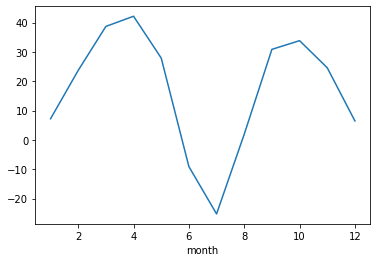

In [8]:
q_clim.plot()

In [9]:
#lets load in CDo remapped data
ld = xr.open_dataset("/g/data/e14/sm2435/CMIP6/long_down.nc").rlds
lu = xr.open_dataset("/g/data/e14/sm2435/CMIP6/long_up.nc").rlus
sd = xr.open_dataset("/g/data/e14/sm2435/CMIP6/short_down.nc").rsds
su = xr.open_dataset("/g/data/e14/sm2435/CMIP6/short_up.nc").rsus
sen = xr.open_dataset("/g/data/e14/sm2435/CMIP6/sens.nc").hfss
lat = xr.open_dataset("/g/data/e14/sm2435/CMIP6/latent.nc").hfls

In [10]:
Qnew = ld - lu + sd - su - sen - lat

In [11]:
print(sd.mean(),su.mean(), ld.mean(), lu.mean(), sen.mean(), lat.mean())

<xarray.DataArray 'rsds' ()>
array(167.84662, dtype=float32) <xarray.DataArray 'rsus' ()>
array(33.851276, dtype=float32) <xarray.DataArray 'rlds' ()>
array(299.20938, dtype=float32) <xarray.DataArray 'rlus' ()>
array(353.00647, dtype=float32) <xarray.DataArray 'hfss' ()>
array(13.567626, dtype=float32) <xarray.DataArray 'hfls' ()>
array(67.73619, dtype=float32)


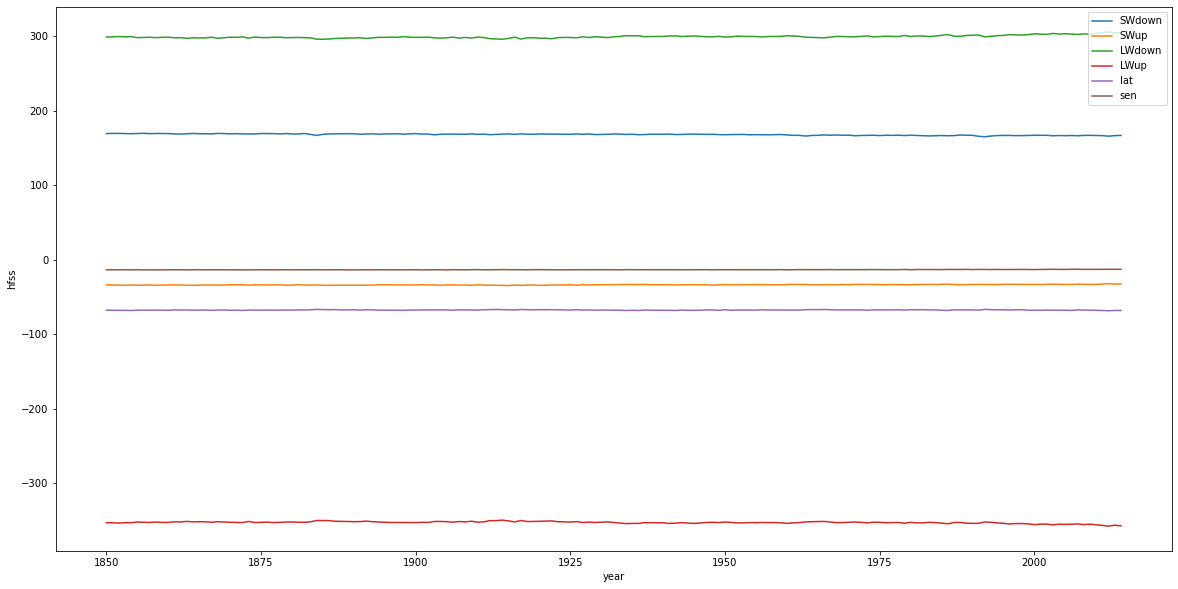

In [37]:
plt.figure(figsize = (20,10))
(sd).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'SWdown')
(-1*su).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'SWup')
(ld).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'LWdown')
(-1*lu).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'LWup')
(-1*lat).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'lat')
(-1*sen).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'sen')
plt.legend()

In [12]:
Qo = xr.open_dataset("/g/data/e14/sm2435/CMIP6/CMIP6/ACCESS-CM2/hfds/hfds_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc").hfds
Qo_clim = Qo.groupby('time.month').mean('time').sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon'])

In [23]:
Qo = xr.open_dataset("/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/hfds/gn/v20191108/hfds_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc").hfds

In [28]:
Qo.mean(['i','j']).mean('time')

<xarray.DataArray 'hfds' ()>
array(0.2338305, dtype=float32)

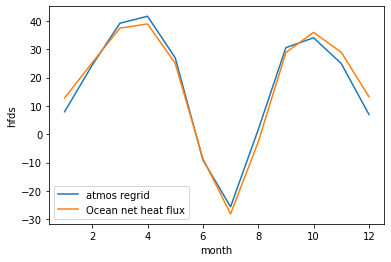

In [13]:
Qnew.groupby("time.month").mean('time').sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon']).plot(label = 'atmos regrid')
#q_clim.plot(label = 'atmos_ungridded')
Qo_clim.plot(label = 'Ocean net heat flux')
plt.legend()

In [14]:
#load in ocean HF terms
swo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/sw1.nc').rsntds
lwo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/lw1.nc').rlntds
senso = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/sens1.nc').hfsso
lato = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/lat1.nc').hflso
qo_new = lwo+swo-senso-lato
qo_newc = qo_new.groupby('time.month').mean('time')

In [15]:
qo_newc

<xarray.DataArray (month: 12, lat: 180, lon: 360)>
dask.array<stack, shape=(12, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

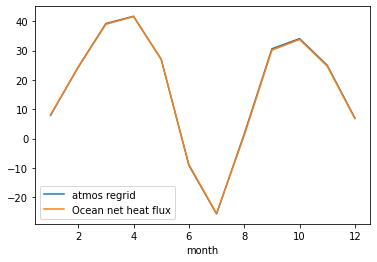

In [16]:
Qnew.groupby("time.month").mean('time').sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon']).plot(label = 'atmos regrid')
#q_clim.plot(label = 'atmos_ungridded')
qo_newc.sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon']).plot(label = 'Ocean net heat flux')
plt.legend()

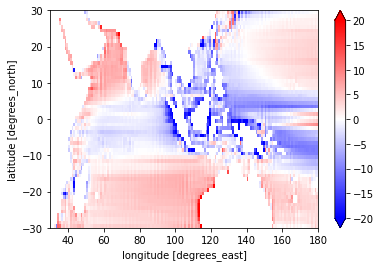

In [18]:
(Qnew.mean('time') 
 - Qo.mean('time')).plot( vmin = -20, vmax = 20, cmap = 'bwr')

Text(0.5, 1.0, 'ACCESS_regridded_AMON_SUM')

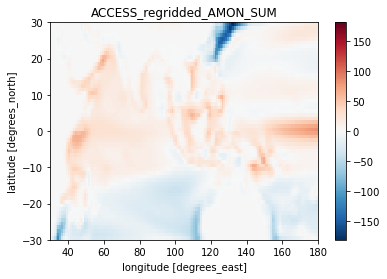

In [19]:
Qnew.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time').plot()
plt.title("ACCESS_regridded_AMON_SUM")

Text(0.5, 1.0, 'ACCESS_regridded_OMON_term')

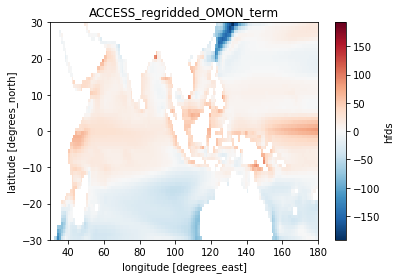

In [20]:
Qo.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time').plot()
plt.title("ACCESS_regridded_OMON_term")

Text(0.5, 1.0, 'ACCESS_difference')

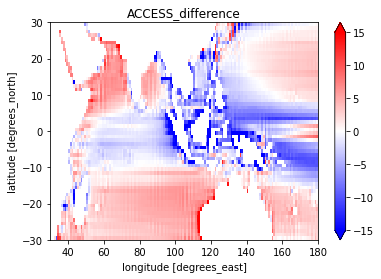

In [27]:
(Qnew.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time') - Qo.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time')).plot(vmin = -15, vmax = 15, cmap = 'bwr')
plt.title("ACCESS_difference")

In [24]:
raino = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/raino.nc').hfrainds
evapo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/evapo.nc').hfevapds

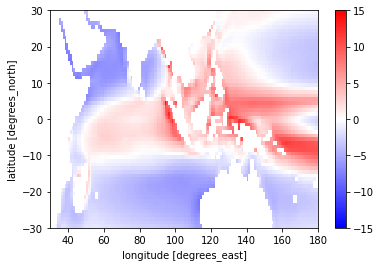

In [28]:
(raino-evapo).sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time').plot(vmin = -15, vmax = 15, cmap = 'bwr') 

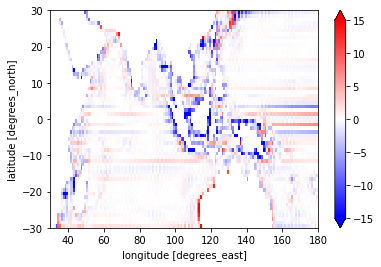

In [31]:
((Qnew.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time') - Qo.sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time')) + ((raino-evapo).sel(lat=slice(-30, 30),lon=slice(30, 180)).mean('time'))).plot(vmin = -15, vmax = 15, cmap = 'bwr') 

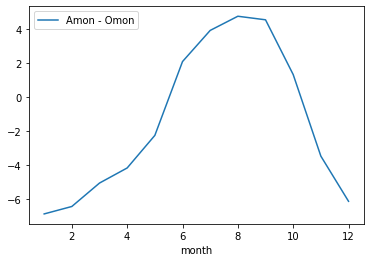

In [29]:
#Qnew.groupby("time.month").mean('time').sel(lat=slice(-10, 0),lon=slice(80, 90)).mean(['lat', 'lon']).plot(label = 'Amon regrid Qnet')
#Qo.groupby('time.month').mean('time').sel(lat=slice(-10, 0),lon=slice(80, 90)).mean(['lat', 'lon']).plot(label = 'O regrid qnet')
(Qnew.groupby("time.month").mean('time').sel(lat=slice(-10, 0),lon=slice(80, 90)).mean(['lat', 'lon']) 
 - Qo.groupby('time.month').mean('time').sel(lat=slice(-10, 0),lon=slice(80, 90)).mean(['lat', 'lon'])).plot(label = 'Amon - Omon')

plt.legend()

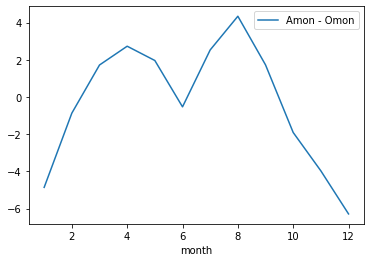

In [65]:
(Qnew.groupby("time.month").mean('time').sel(lat=slice(-10, 10),lon=slice(60, 70)).mean(['lat', 'lon']) - Qo_clim).plot(label = 'Amon - Omon')
plt.legend()

In [23]:
#load in ocean HF terms
swo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/sw1.nc').rsntds
lwo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/lw1.nc').rlntds
senso = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/sens1.nc').hfsso
lato = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/lat1.nc').hflso
raino = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/raino.nc').hfrainds
evapo = xr.open_mfdataset('/g/data/e14/sm2435/CMIP6/evapo.nc').hfevapds

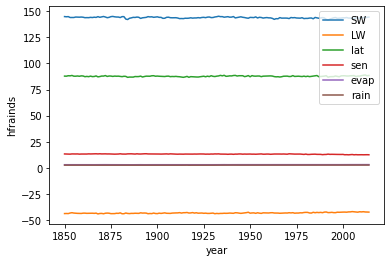

In [74]:
swo.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'SW')
lwo.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'LW')
-1*lato.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'lat')
-1*senso.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'sen')
evapo.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'evap')
-1*raino.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'rain')
plt.legend()

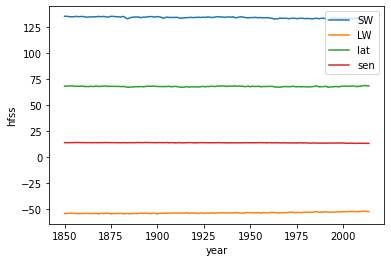

In [75]:
(sd-su).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'SW')
(ld-lu).mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'LW')
-1*lat.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'lat')
-1*sen.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'sen')
#evapo.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'evap')
#-1*raino.mean(['lat', 'lon']).groupby('time.year').mean('time').plot(label = 'rain')
plt.legend()

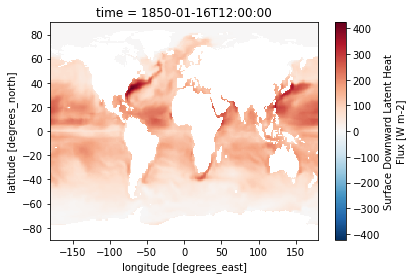

In [60]:
lato[0].plot()

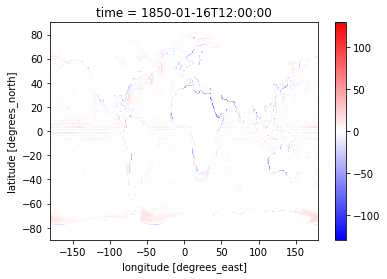

In [83]:
(lat[0]-(lato[0])).plot(cmap = 'bwr')

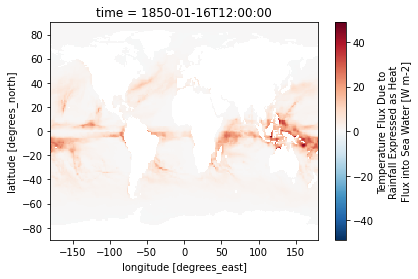

In [56]:
raino[0].plot()

In [67]:
qo_new = lwo+swo-senso-lato+raino-evapo#+evapo-raino
#qo_new[0].plot()

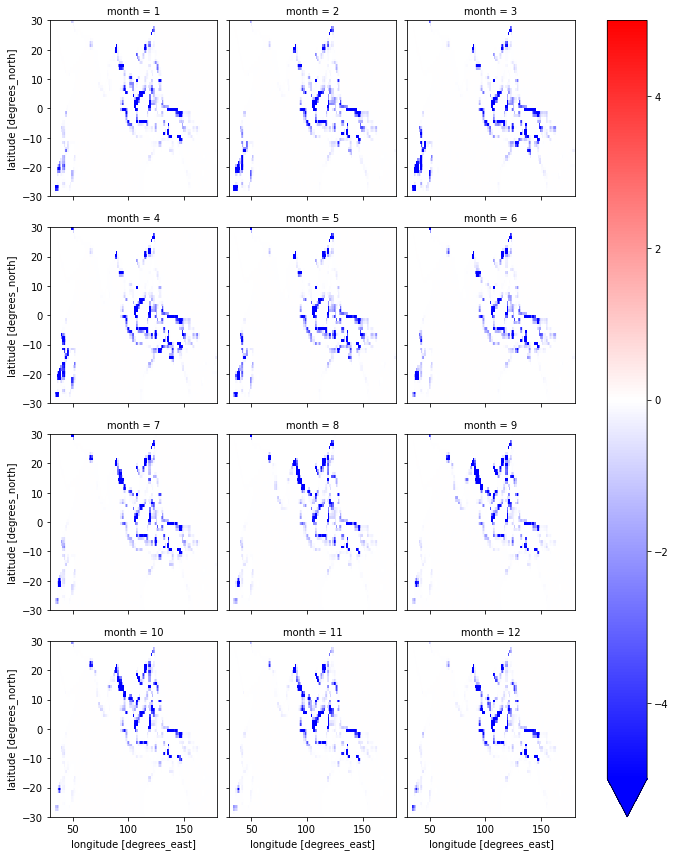

In [70]:
(qo_new.groupby("time.month").mean('time') - Qo.groupby("time.month").mean('time')).plot(col = 'month', col_wrap = 3, vmin = -5, vmax = 5, cmap = 'bwr')

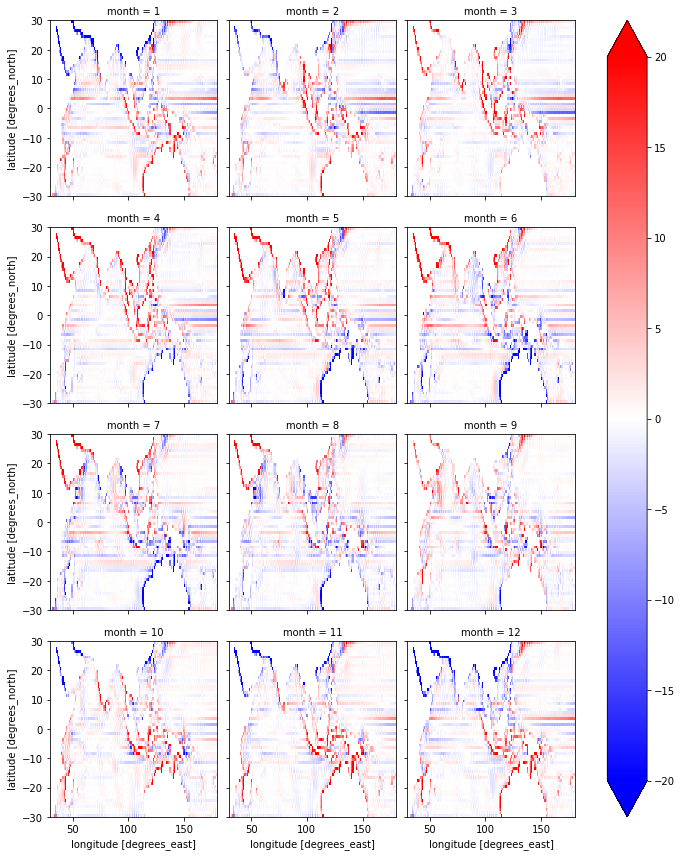

In [53]:
(qo_new.groupby("time.month").mean('time') - Qnew.groupby("time.month").mean('time')).sel(lat=slice(-30, 30),lon=slice(30, 180)).plot(col = 'month', col_wrap = 3, vmin = -20, vmax = 20, cmap = 'bwr')
                                                                                                                               
                                                                                                                               
                                                                                                                               

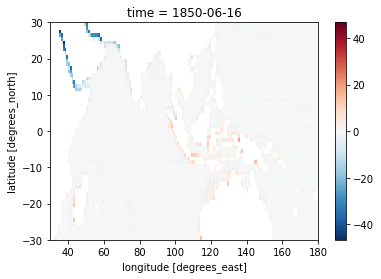

In [38]:
(ld-lu -lwo).sel(lat=slice(-30, 30),lon=slice(30, 180))[5].plot()

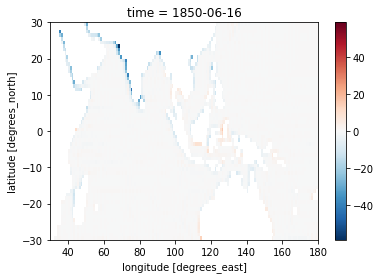

In [35]:
(senso-sen).sel(lat=slice(-30, 30),lon=slice(30, 180))[5].plot()

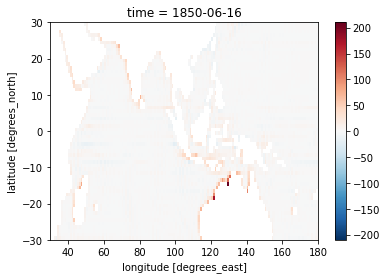

In [37]:
(lato-lat).sel(lat=slice(-30, 30),lon=slice(30, 180))[5].plot()